In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
os.environ["KERAS_BACKEND"] = "torch"

In [5]:
df = pd.read_csv('fashion_mnist/fashion-mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

df = pd.read_csv('fashion_mnist/fashion-mnist_test.csv')
x_test = df.drop('label', axis=1)
y_test = df['label']

x_train.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


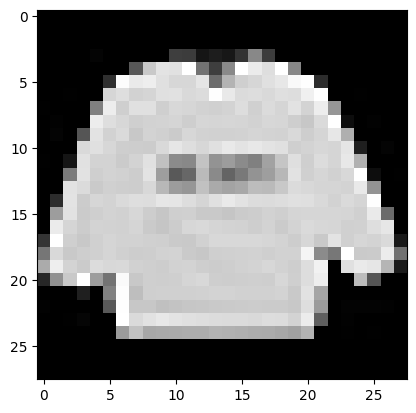

In [6]:
zz = x_train.values[0].reshape(28, 28)
plt.imshow(zz, cmap='gray')
plt.show()

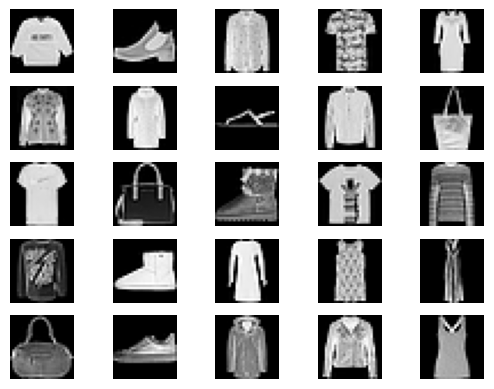

In [7]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train.values[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
# https://keras.io/getting_started/intro_to_keras_for_engineers/

#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [9]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
x_train = x_train.values
y_train = y_train.values
x_train = x_train.reshape(x_train.shape[0], 28,28,1)

x_test = x_test.values
y_test = y_test.values
x_test = x_test.reshape(x_test.shape[0], 28,28,1)


print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [11]:

callbacks = [
    #keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=callbacks)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 1.0874 - val_loss: 0.5341
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.5616 - val_loss: 0.4036
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.4509 - val_loss: 0.3414
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.3954 - val_loss: 0.3316
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.3641 - val_loss: 0.3005
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.3357 - val_loss: 0.2964
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 0.3163 - val_loss: 0.2857
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 0.2999 - val_loss: 0.2760
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 0.2803 - val_loss: 0.2481
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.2666 - val_loss: 0.2468
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.2603 - val_loss: 0.2440
Epoch 12

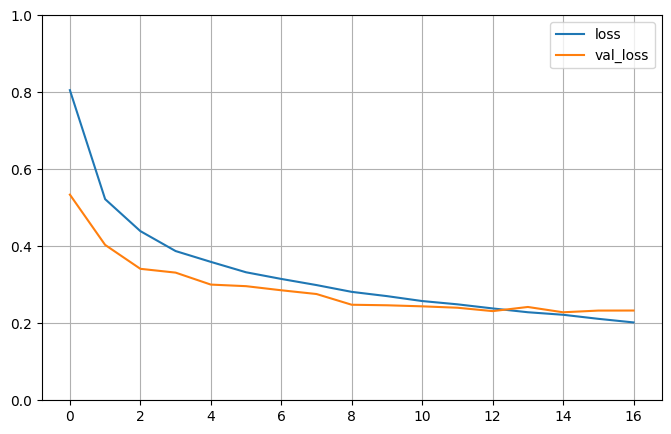

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
model.save('saved_mnistCONV.keras')

In [14]:
model = keras.saving.load_model("saved_mnistCONV.keras")

In [15]:
predictions = model.predict(x_test)
predictions[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[9.9058002e-01, 4.8807869e-10, 2.5254041e-05, 5.1293755e-05,
        2.1923781e-06, 1.5075267e-08, 9.3411719e-03, 5.9531137e-11,
        2.0249213e-09, 1.0940292e-09],
       [4.0460917e-14, 1.0000000e+00, 5.8181855e-11, 2.8023130e-15,
        3.8326811e-12, 5.0969506e-24, 7.8463478e-13, 1.6815895e-26,
        1.0570173e-14, 1.1556146e-19]], dtype=float32)

In [16]:
predictions = [np.argmax(p) for p in predictions]
predictions[:2]

[np.int64(0), np.int64(1)]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 977    0    2    0    0    0    0    0    0    1]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    0 1029    0    1    0    0    1    0    0]
 [   0    1    0 1003    0    4    0    0    1    1]
 [   0    1    2    0  963    0    0    0    2   14]
 [   0    0    2    4    0  884    1    0    0    1]
 [   7    2    5    0    0    1  942    0    1    0]
 [   0    6    4    0    0    0    0 1014    0    4]
 [   0    0    0    1    0    1    0    0  969    3]
 [   3    1    1    0    2    0    0    2    1  999]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99   

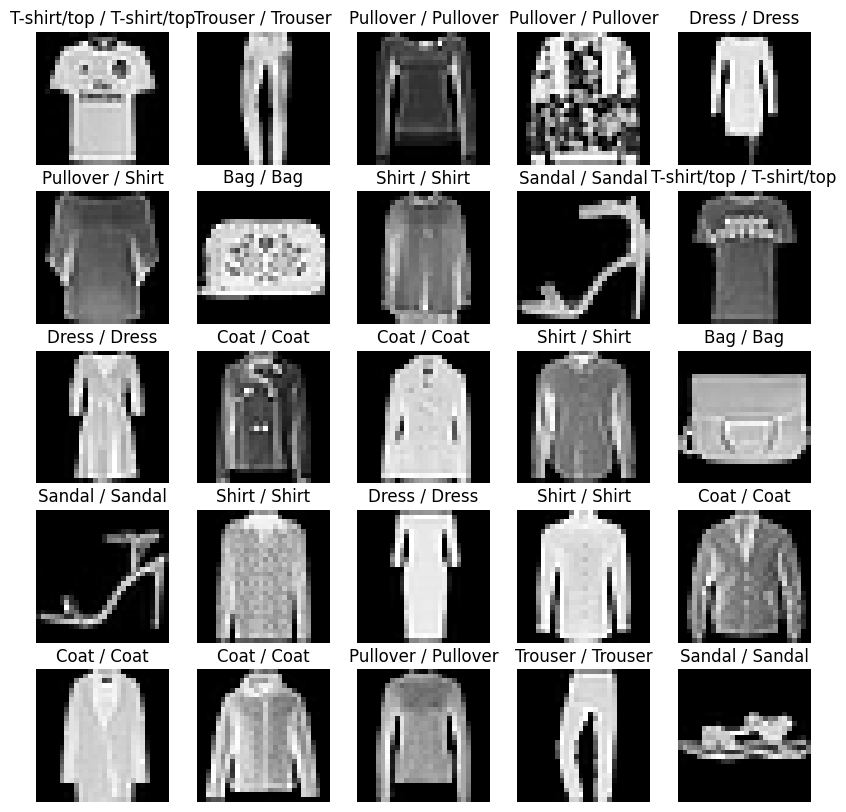

In [19]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'{class_names[y_test[i]]} / {class_names[predictions[i]]}')
    plt.axis('off')
plt.show()

In [20]:
errors = []
for i in range(len(y_test)):
    if y_test[i] != predictions[i]:
        errors.append(i)    
len(errors)

778

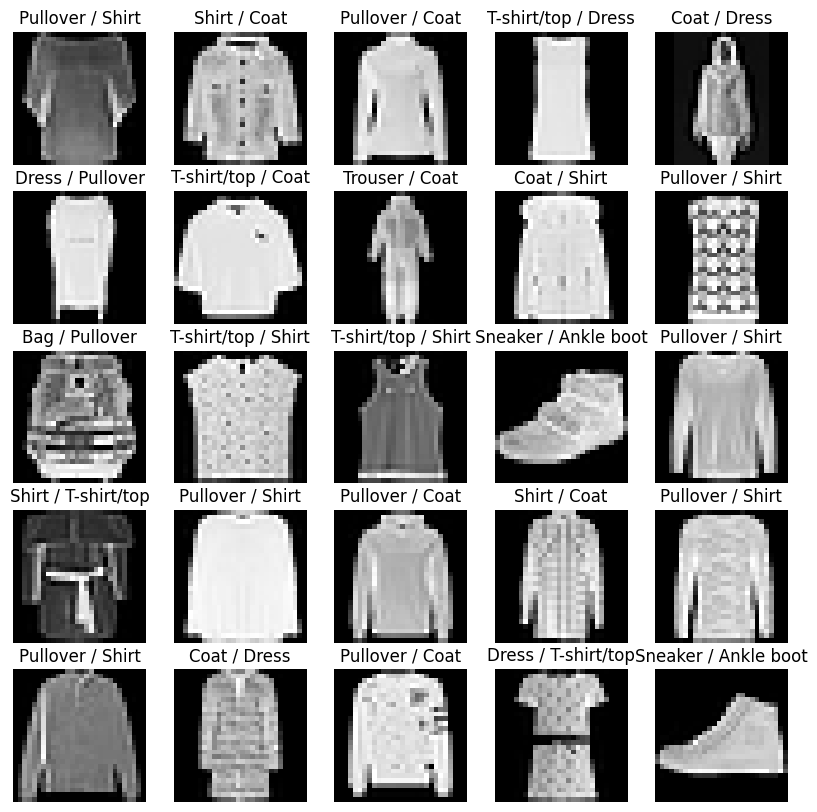

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    
    plt.subplot(5, 5, i+1)
    
    i = errors[i]
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'{class_names[y_test[i]]} / {class_names[predictions[i]]}')
    plt.axis('off')
plt.show()